<a href="https://colab.research.google.com/github/keywoong/deeplearning_with_python/blob/main/4_Fundamentals_of_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 Four banches of machine learning
## 4.1.1 Supervised learning
#### 딥러닝의 거의 모든 응용 분야는 `등장인물 인식`, `음성인식`, `이미지 분류`, `언어 번역` 등이 있다. 
#### 지도학습은 분류나 회귀하는데 주로 사용이 되지만, 또 다른 분야에도 사용된다고 한다.
#### `Sequence generation` : 사진을 보고 무엇인지를 예측한다. Sequence generation은 Classification 문제로도 분류되기도 한다.
#### `Syntax tree prediction` : 주어진 문장을 읽고, 구문 단위로 문장을 분류하는 작업이다.
#### `Object detection` : 주어진 사진에서 특정 물체의 윤곽선을 따는 작업. Classification이나 윤곽선 구성이 벡터 회귀연산으로도 예측이 가능하기 때문에 regeression으로도 분류된다. 
#### `Image segmentation` : 주어진 사진에서 특정 물체를 픽셀 단위로 그리는 작업이다.
## 4.1.2 Unsupervised learning
#### 비지도 학습은 target값 없이 이루어지는 학습방법이다. 비지도 학습은 주로 `데이터 시각화`, `데이터 요약`, `데이터의 상관관계` 등에 응용된다. 
#### `차원 축소`나 `클러스터링`에도 사용된다.
## 4.1.3 Self-supervised learning
#### 
## 4.1.4 Reinforcement learning

# <br/>
# 4.2 Evaluating machine-learning models
## 4.2.1 Training, validation, and test sets
#### 모델를 평가하는 것은 이용가능한 데이터를 세가지로 분류하는 과정을 포함한다. 데이터를 training dat, validation data, test data 이렇게 3개의 sets로 분류한다. 
#### 모델을 발전시키는 것은 layer의 숫자나 크기를  결정하여 모델의 구조를 변형시키는 것(tuning its configuration)을 의미하고, 이는 가중치 변형으로 이루어진다.
#### 만약 validation set으로 학습된 모델은 overfitting이 될 수 있다. 그러기 때문에 모델이 접근하지 않은 test set으로 평가를 해야 한다.
#### 하지만 데이터의 수가 적다면 어떻게 해야 할까? 세 방법이 존재한다. `simple hold-out validation`, `K-fold validation`, `iterated K-fold validation`
### `1) Simple hold-out validation`

In [ ]:
from keraa.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).


#### `2) K - fold validation`
#### 1. 우선 데이터를 K개로 나눈다.
#### 2. i 번째 데이터는 validation을 위한 데이터, 나머지 K-1개의 데이터는 training 데이터이다.
#### 3. 이 과정을 K번 반복해야 한다.
#### 4. 마지막 점수는 K개 점수들의 평균값이다.
####  `3) iterated K-fold validation`
#### 
## 4.2.2 Things to keep in mind
#### validation 방법을 고를 때는 크게 3가지를 고려해야 한다.
#### `Data representativeness`
#### -> 데이터를 split하기 전에는 적절하게 shuffle하는 것이 중요하다.
#### `The arrow of time`
#### -> 시간이 영향을 줄 때는 데이터가 발생한 시점도 중요하다. 예를 들면 내일의 날씨, 주식 등이 있다. 이들은 무작위로 데이터를 shuffle하면 안됨. 정리하자면 test set은 training set보다 미래의 것이어야 한다.
#### `Redundancy in your data`
#### random하게 shuffle하고 training set과 validation set으로 split을 할 때 각각의 세트에 동일한 데이터가 있을 수 있다. 이는 train한 것으로 validation을 하게 되는 것이므로 disjoint하게 split해야 한다.
# 4.3 Data preprocessing, feature engineering and feature learning
## 4.3.1 Data preprocessing for neural networks
#### 데이터 가공은 날 것의 데이터를 신경망 구조에 맞는 형태로 만드는 것이다. 이 과정에서는 4가지를 포함한다. 
#### `1. vectorization`
#### 입력값과 타겟값은 무조건 tensor형태여야 한다. 소리든, 이미지든, 문자든 이들을 가공하려면 벡터화시켜야 한다. 
#### `2. Value normalization`
#### 이미지 데이터를 가공할 때(classification), 픽셀값을 0에서 1 사이의 값으로 바꾸어야 하고 집값을 예측할 때 (regression) 0을 중심으로 정규화를 시켜야 한다.
#### 이처럼 네트워크에 데이터를 넣으려면 정규화 과정을 거쳐야 한다.
#### 평균이 0이 되도록 정규화시킨다 & 표준편차가 1이 되도록 정규화시킨다
#### `3. Handling missing values`
#### 만약 training data나 test data에 값이 빠져 있다면 어떻게 해야 하는가? 보통 0으로 넣고, 네트워크는 그 0이 missing data라고 인식하여 무시하도록 한다. 
## 4.3.2 Feature engineering
#### 머신러닝이 데이터를 더 잘 이해하도록 알고리즘을 만드는 과정이다. 
#### 예시로 머신러닝이 시계를 인식하는 과정이 소개되었음.
#### 시계 이미지를 CNN으로 인식하는 것보단, 시침과 분침이 가르키는 좌표를 인식하는게 더 낫다.
#### making a problem easier by expressing it in a simpler way

## 4.4 Overfitting and underfitting
#### Optimization : training data를 통해 모델이 최적화가 되도록 수정하는 과정
#### Generalization : validation data와 같은 새로 접하는 데이터에 대해서 얼마나 모델이 정답을 맞추는가
#### 최종적으로는 Generalization이 목표이지만, 우리는 training data을 통한 모델 수정밖에 할 수 없다.
#### overfitting이 되면 training data에만 일치하고 새로운 데이터에 대해서는 잘못된 결과를 이끌어낼 수 있다.
#### `best solution`
#### 1. Getting more training data 
#### 데이터 수가 더 많으면 일반화를 더 잘할 수 있다.
#### 2. Modulating the quantity of information
#### 모델이 필요로 하는 데이터의 수를 줄인다. 
#### 이러한 과정들을 `regulation`이라고 부른다.


## 4.4.1 Reducing the network's size
#### overfitting을 예방하는 방법은 모델의 크기를 줄이는 것이다. 모델의 크기는 parameter 개수의 의지하고, parameter의 수가 많으면 메모리 용량이 크다고 한다. 
#### 모델은 용량이 너무 커서도 안되고, 너무 적어서도 안된다. 따라서 적절한 용량을 구하는 것이 중요하다. 
#### 적절한 모델의 크기를 정하는 방법은 상대적은 적은 양의 층과 매개변수로 모델을 만들고, 점점 늘려나가는 방법이다. 

In [ ]:
# 4.3 Original model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
# 4.4 Version of the model with lower capacity
model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

#### 이렇게 original한 네트워크와 small한 네트워크 있다. 이 모델들을 대상으로 validation loss를 구해보면 epochs가 증가함에 따라 original model의 손실값이 더 큰 것을 알 수 있다. 따라서 모델의 크기를 작게 하여 overfitting을 막을 수 있음을 알 수 있다.

In [ ]:
# 4.5 Version of the model with higher capacity
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

#### 위에는 bigger한 네트워크가 있다. original한 네트워크와 validation loss를 비교하면 bigger 네트워크가 더 크다. 
#### 반면에 training loss에 대하여 비교를 해보면 original 네트워크의 loss값이 bigger 네트워크의 loss값보다 훨씬 더 크다. 이를 통해 네트워크의 용량이 더 클수록, training data에 더 적합하지만 overfitting이 일어남을 알 수 있다.

## 4.4.2 Adding weight regularization
#### 모델이 더 간단할 수록 overfitting이 될 가능성은 낮아진다. 여기서 간단하다는 것은 매개변수의 개수가 적다는 것을 의미한다.
#### `weight regularization` : overfitting을 줄이는 방법은 가중치 값을 작게 하여 가중치의 분포를 보다 더 규칙적으로 만드는 것이다. 이렇게 하면 네트워크의 복잡성을 제재할 수 있다.(?) 이런 방식을 `weight regularization`이라 한다. 네트워크의 손실함수에 큰 값을 가지는 가중치와 관련된 cost값을 더함으로써 실행된다.
#### 1. `L1 regularization` : 가중치 계수의 절댓값
#### 2. `L2 regularization` : weight decay라도고 불림. 가중치 계수의 제곱값

In [ ]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

#### 여기서 l2(0.001)은 모든 가중치 계수에 가중치계수 * 0.001 한 값을 더해준다는 것을 의미한다. 이렇게 cost에 대한 페널티를 추가한다. 이는 training 기간에만 작용하기 때문에 test 기간보다 training 기간에서 얻는 loss값이 더 크다.

In [ ]:
# Different weight regularizers available in Keras
from keras import regularizers

# L1 Regularization
regularizers.l1(0.001)
 
# Simultaneous L1 and L2 Regularization
regularizers.l1_l2(l1 = 0.001, l2 = 0.001)

## 4.3.3 Adding dropout
#### dropout은 training하는 과정에서 실행되는데, 층에서 꽤 많은 양의 출력 특징들을 무작위로 떼내어버리는 것이다. 0으로 만들어 버리는 것이다.
#### dropout의 비율은 0이 된 특징들의 비율이다.
#### training에서만 진행되므로 test를 할 때는 사용되지 않는다.  

#### 다음은 dropout을 한 예제와 dropout을 하지 않았을 때의 예제를 비교한 소스코드이다.

Epoch 1/20
16/16 [==============================] - 1s 77ms/step - loss: 2.9733 - accuracy: 0.4237 - val_loss: 1.9703 - val_accuracy: 0.5980
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.8053 - accuracy: 0.6054 - val_loss: 1.4418 - val_accuracy: 0.6680
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.4006 - accuracy: 0.6827 - val_loss: 1.2669 - val_accuracy: 0.7140
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 1.2015 - accuracy: 0.7253 - val_loss: 1.1563 - val_accuracy: 0.7400
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0608 - accuracy: 0.7558 - val_loss: 1.0925 - val_accuracy: 0.7570
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.9513 - accuracy: 0.7776 - val_loss: 1.0568 - val_accuracy: 0.7610
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8659 - accuracy: 0.7977 - val_loss: 1.0014 - val_accuracy: 0.7860
Epoch 8/20
16

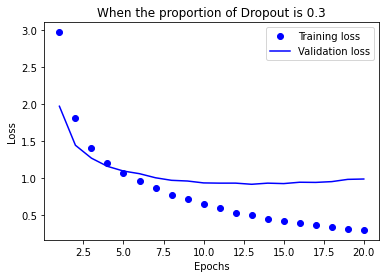

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

import numpy as np

def vectorize_sequences(sequences,dim = 10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('When the proportion of Dropout is 0.3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Dropout using IMDB datasets
from keras.datasets import imdb
from keras import models
from keras import layers

# data load
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

# vectorize the data
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# model build
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

# model compile
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# model fit
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo',label = "Training loss")
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.yplabel('Loss')
plt.legend()

plt.show()

Epoch 1/20
47/47 [==============================] - 1s 30ms/step - loss: 0.6177 - accuracy: 0.6513 - val_loss: 0.4752 - val_accuracy: 0.8670
Epoch 2/20
47/47 [==============================] - 1s 22ms/step - loss: 0.4871 - accuracy: 0.7828 - val_loss: 0.3604 - val_accuracy: 0.8820
Epoch 3/20
47/47 [==============================] - 1s 22ms/step - loss: 0.3989 - accuracy: 0.8475 - val_loss: 0.3000 - val_accuracy: 0.8850
Epoch 4/20
47/47 [==============================] - 1s 22ms/step - loss: 0.3344 - accuracy: 0.8792 - val_loss: 0.2721 - val_accuracy: 0.8850
Epoch 5/20
47/47 [==============================] - 1s 21ms/step - loss: 0.2920 - accuracy: 0.8987 - val_loss: 0.2646 - val_accuracy: 0.8950
Epoch 6/20
47/47 [==============================] - 1s 21ms/step - loss: 0.2591 - accuracy: 0.9130 - val_loss: 0.2646 - val_accuracy: 0.8900
Epoch 7/20
47/47 [==============================] - 1s 23ms/step - loss: 0.2340 - accuracy: 0.9222 - val_loss: 0.2687 - val_accuracy: 0.8870
Epoch 8/20
47